# 1. Load the dataset and pre-process the images 

In [129]:
#Import the required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

In [130]:
# Set the path to the dataset
dataset_path = "C:/Users/Dell/Desktop/New Tryy/Dataset3"

In [131]:
# Define the image size and batch size
image_size = (256, 256)
batch_size = 64

In [132]:
# Create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.8, 1.2),
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
)

In [133]:
valid_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.8, 1.2),
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,))

In [169]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.8, 1.2),
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,)

In [135]:
training_set = train_datagen.flow_from_directory("C:/Users/Dell/Desktop/New Tryy/Dataset3/Train",
target_size=(224,224),
batch_size= 64,
class_mode='categorical')

Found 6530 images belonging to 6 classes.


In [136]:
validation_set = test_datagen.flow_from_directory("C:/Users/Dell/Desktop/New Tryy/Dataset3/Valid",
target_size=(224, 224),
batch_size= 64,
class_mode='categorical')

Found 2178 images belonging to 6 classes.


In [170]:
test_set = test_datagen.flow_from_directory("C:/Users/Dell/Desktop/New Tryy/Dataset3/Test",
target_size=(224, 224),
batch_size= 64,
class_mode='categorical')

Found 2175 images belonging to 6 classes.


# 2. Load the pre-trained MobileNetV2 model

In [138]:
# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights="imagenet",
                         input_shape=(224, 224, 3), 
                         include_top=False)

In [139]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [140]:
# Add custom layers
num_classes = 6
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [159]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# 3.Train the model with fine-tuning

In [141]:
# Fine-tune the model
base_model.trainable = True
fine_tune_at = 100

In [142]:
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [157]:
import glob
folders = glob.glob("C:/Users/Dell/Desktop/New Tryy/Dataset3/Train/*")

In [158]:
folders

['C:/Users/Dell/Desktop/New Tryy/Dataset3/Train\\Tomato_Early_blight',
 'C:/Users/Dell/Desktop/New Tryy/Dataset3/Train\\Tomato_Healthy',
 'C:/Users/Dell/Desktop/New Tryy/Dataset3/Train\\Tomato_Late_blight',
 'C:/Users/Dell/Desktop/New Tryy/Dataset3/Train\\Tomato_Septoria_leaf_spot',
 'C:/Users/Dell/Desktop/New Tryy/Dataset3/Train\\Tomato__Target_Spot',
 'C:/Users/Dell/Desktop/New Tryy/Dataset3/Train\\Tomato__Tomato_YellowLeaf__Curl_Virus']

In [143]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [ ]:
#from keras.callbacks import EarlyStopping

# define early stopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=5)


In [144]:
history = model.fit(training_set,
                    validation_data= validation_set,
                    epochs=100,
                    steps_per_epoch=len(training_set),
                    validation_steps=len(validation_set))

Epoch 1/100
103/103 [==============================] - 268s 3s/step - loss: 1.0773 - accuracy: 0.5994 - val_loss: 1.3365 - val_accuracy: 0.6221
Epoch 2/100
103/103 [==============================] - 274s 3s/step - loss: 0.4111 - accuracy: 0.8577 - val_loss: 1.8799 - val_accuracy: 0.6143
Epoch 3/100
103/103 [==============================] - 271s 3s/step - loss: 0.2809 - accuracy: 0.9037 - val_loss: 1.4069 - val_accuracy: 0.7231
Epoch 4/100
103/103 [==============================] - 271s 3s/step - loss: 0.2104 - accuracy: 0.9319 - val_loss: 1.5230 - val_accuracy: 0.7282
Epoch 5/100
103/103 [==============================] - 280s 3s/step - loss: 0.1651 - accuracy: 0.9470 - val_loss: 1.5198 - val_accuracy: 0.7378
Epoch 6/100
103/103 [==============================] - 271s 3s/step - loss: 0.1550 - accuracy: 0.9499 - val_loss: 1.4184 - val_accuracy: 0.7916
Epoch 7/100
103/103 [==============================] - 270s 3s/step - loss: 0.1197 - accuracy: 0.9606 - val_loss: 1.1284 - val_accuracy:

# 4. Evaluate the model

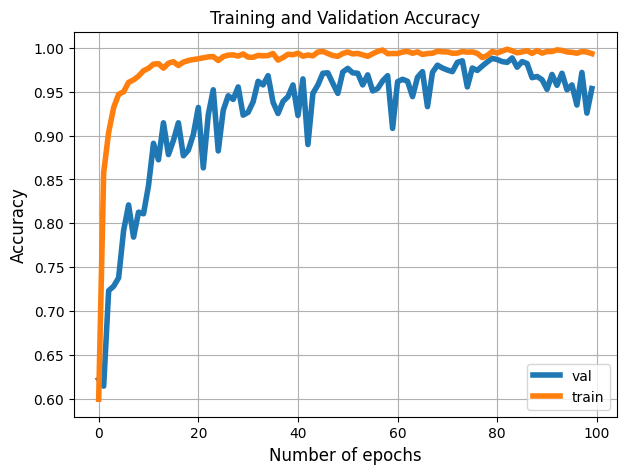

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot(history.history['val_accuracy'],linewidth = 4)
plt.plot(history.history['accuracy'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

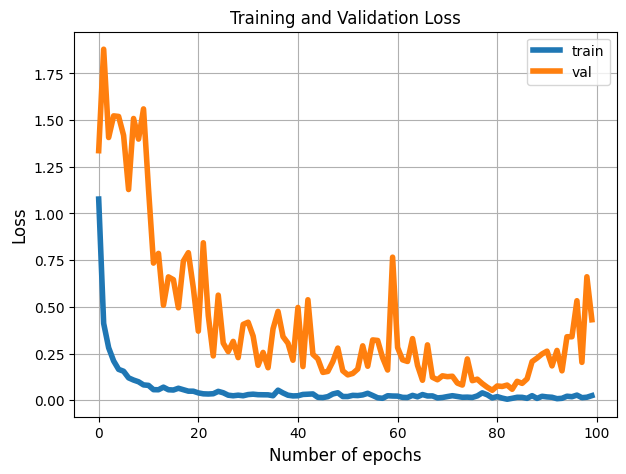

In [146]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()

In [147]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_set)
print(f" Test loss: {test_loss:.4f},  Test Accuracy: {test_acc:.4f}")

34/34 [==============================] - 39s 1s/step - loss: 0.3811 - accuracy: 0.9591
 Test loss: 0.3811,  Test Accuracy: 0.9591


# 5. Save the model

In [149]:
# Define the version string for the saved model
version = "2.0.1"

In [150]:
# Save the model with version details
model.save(f"tomato_disease_classifier_v{version.replace('.', '_')}.h5")

In [151]:
# Load the saved Keras model
model = tf.keras.models.load_model("tomato_disease_classifier_v2_0_1.h5")

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("tomato_disease_classifier_v2_0_1.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Dell\AppData\Local\Temp\tmp6aez0r4m\assets


INFO:tensorflow:Assets written to: C:\Users\Dell\AppData\Local\Temp\tmp6aez0r4m\assets


In [125]:
# Load the saved model
from tensorflow.keras.models import load_model
model = load_model("tomato_disease_classifier_v2_0_1.h5")